In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_t2_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_t2_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_t2_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_t2_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_t2_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_t2_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  728
Number val images:  36
Number test images:  35


In [4]:
model_name = 'vgg_bayesian_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98302371 0.01697629]
[ 1.         57.90569446]
[0.01712204 4.07593777]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
91/91 [==============================] - 545s 6s/step - loss: 0.0303 - acc: 0.5627 - dice: 0.0686 - iou: 0.0356 - val_loss: 0.0424 - val_acc: 0.7939 - val_dice: 0.1012 - val_iou: 0.0533
Epoch 1
Epoch 1/1
91/91 [==============================] - 538s 6s/step - loss: 0.0195 - acc: 0.6718 - dice: 0.0939 - iou: 0.0494 - val_loss: 0.0313 - val_acc: 0.7456 - val_dice: 0.0950 - val_iou: 0.0498
Epoch 2
Epoch 1/1
91/91 [==============================] - 539s 6s/step - loss: 0.0157 - acc: 0.7452 - dice: 0.1177 - iou: 0.0629 - val_loss: 0.0893 - val_acc: 0.9038 - val_dice: 0.0533 - val_iou: 0.0274
Epoch 3
Epoch 1/1
91/91 [==============================] - 539s 6s/step - loss: 0.0137 - acc: 0.7969 - dice: 0.1439 - iou: 0.0781 - val_loss: 0.0528 - val_acc: 0.8787 - val_dice: 0.1257 - val_iou: 0.0671
Epoch 4
Epoch 1/1
91/91 [==============================] - 539s 6s/step - loss: 0.0114 - acc: 0.8483 - dice: 0.1836 - iou: 0.1021 - val_loss: 0.0764

Epoch 40
Epoch 1/1
91/91 [==============================] - 544s 6s/step - loss: 0.0018 - acc: 0.9806 - dice: 0.6260 - iou: 0.4594 - val_loss: 0.2440 - val_acc: 0.9770 - val_dice: 0.0618 - val_iou: 0.0319
Epoch 41
Epoch 1/1
91/91 [==============================] - 545s 6s/step - loss: 0.0018 - acc: 0.9805 - dice: 0.6252 - iou: 0.4584 - val_loss: 0.2441 - val_acc: 0.9733 - val_dice: 0.0632 - val_iou: 0.0326
Epoch 42
Epoch 1/1
91/91 [==============================] - 544s 6s/step - loss: 0.0018 - acc: 0.9801 - dice: 0.6198 - iou: 0.4529 - val_loss: 0.2357 - val_acc: 0.9745 - val_dice: 0.1048 - val_iou: 0.0553
Epoch 43
Epoch 1/1
91/91 [==============================] - 546s 6s/step - loss: 0.0018 - acc: 0.9805 - dice: 0.6246 - iou: 0.4579 - val_loss: 0.2573 - val_acc: 0.9774 - val_dice: 0.0380 - val_iou: 0.0194
Epoch 44
Epoch 1/1
91/91 [==============================] - 545s 6s/step - loss: 0.0017 - acc: 0.9809 - dice: 0.6296 - iou: 0.4631 - val_loss: 0.2412 - val_acc: 0.9761 - val_dice: 

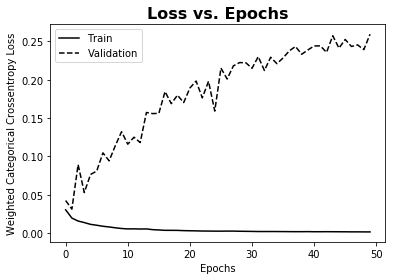

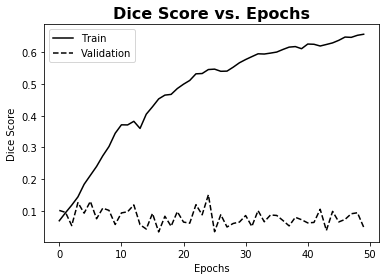

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  27149.038797230998


In [14]:
epochs = 24

In [15]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99  35908016
           1       0.52      0.99      0.68    620112

   micro avg       0.98      0.98      0.98  36528128
   macro avg       0.76      0.99      0.84  36528128
weighted avg       0.99      0.98      0.99  36528128

F1/dice (binary):  0.6784423314579919
Jaccard/IOU:  0.5133656650840481


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [17]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1779279
           1       0.09      0.08      0.09     27057

   micro avg       0.97      0.97      0.97   1806336
   macro avg       0.54      0.53      0.54   1806336
weighted avg       0.97      0.97      0.97   1806336

F1/dice (binary):  0.0873643626535236
Jaccard/IOU:  0.04567747298420615


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [19]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1714591
           1       0.21      0.07      0.10     41569

   micro avg       0.97      0.97      0.97   1756160
   macro avg       0.59      0.53      0.54   1756160
weighted avg       0.96      0.97      0.96   1756160

F1/dice (binary):  0.0995737801293357
Jaccard/IOU:  0.05239549901395924


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)